# Perceptron

### Multi Layer Perceptron (Neural Network)

perceptron : 선형모델 -> Multi layer Perceptron : 비선형모델

In [1]:
from sklearn.neural_network import MLPClassifier

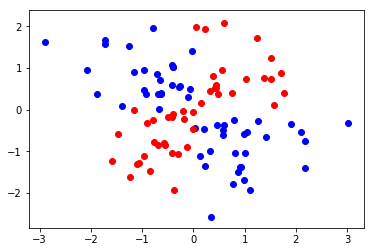

In [75]:
import numpy as np
from matplotlib import pyplot as plt
#200개의 데이터, feature = 2개
np.random.seed(30)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='b')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r')
plt.show()

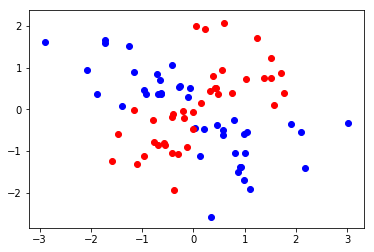

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)
plt.scatter(X_train[y_train==1, 0],
            X_train[y_train==1, 1], c='b')
plt.scatter(X_train[y_train==-1, 0],
            X_train[y_train==-1, 1], c='r')
plt.show()

In [115]:
model_pctr = MLPClassifier(hidden_layer_sizes=(1))

In [116]:
model_pctr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [117]:
model_pctr.score(X_test, y_test)

0.65

In [118]:
model_pctr.score(X_train, y_train)

0.6125

In [119]:
model_pctr2 = MLPClassifier(hidden_layer_sizes=(100, 10)).fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [120]:
model_pctr2.score(X_test, y_test)

0.9

In [121]:
model_pctr2.score(X_train, y_train)

0.9875

#### parameter 
- activation  
1) default : relu  
2) logistic  
3) tanh (sigmoid 일종)  
4) indentity : linear  
  
- solver   
1) default : adam  
2) lbfgs   
3) sgd : stochastic(확률적) gradient decent  
  
- alpha : l2 norm 규제 정도 (Ridge regression과 동일)
  
- tol : cost 가 학습을 멈추는 기준 값 (cost = tol 일 될때까지)
  
- max_iter : optimizing 최대 반복 수

In [97]:
model_pctr2.coefs_

[array([[ 2.79635273e-01,  6.68375238e-02,  6.08793518e-02,
          3.40824015e-01,  3.13314836e-01,  1.72981930e-01,
          3.34884757e-02,  3.92384733e-02,  3.41495711e-01,
         -3.92441421e-01,  4.39733405e-02, -3.38898031e-01,
         -2.53673725e-01,  1.64726288e-01, -7.32883273e-02,
         -2.50402854e-01,  3.29460900e-01,  8.98295985e-02,
          3.68725457e-01,  1.40253443e-01, -2.50394417e-02,
          5.41585623e-06, -1.67164479e-02,  2.91920977e-01,
         -1.43902356e-01, -2.43816126e-01,  2.19066135e-03,
          4.14853239e-01, -1.12000598e-01,  1.42427157e-01,
          2.44779386e-01, -6.71345019e-02, -3.50330213e-03,
          4.68848948e-02,  2.51514309e-01,  3.12167867e-01,
          2.88330395e-01, -2.91607613e-01,  3.36893330e-01,
         -3.54994317e-01,  1.33855840e-01,  3.46003462e-06,
          2.08953906e-01, -2.77453568e-01,  2.22183799e-01,
         -3.94233682e-02, -1.78679510e-01,  3.16033651e-01,
         -1.87470037e-01, -2.53995666e-0

In [102]:
len(model_pctr2.coefs_)

3

In [122]:
#각 층의 coef 개수
for i, coef in enumerate(model_pctr2.coefs_):
    print('hidden_layer_{}_weight_no: {}'.format(i, coef.shape))

hidden_layer_0_weight_no: (2, 100)
hidden_layer_1_weight_no: (100, 10)
hidden_layer_2_weight_no: (10, 1)


In [100]:
model_pctr2.intercepts_

[array([-1.23736104e-03, -2.29566643e-01, -7.19091819e-03,  4.06172378e-02,
         1.57294286e-01, -2.69285177e-04,  1.62221900e-01, -1.32496705e-01,
        -3.11743866e-02,  2.11299416e-01,  9.75121479e-02,  2.25921153e-01,
         6.67592957e-02,  2.95706315e-01,  2.86703124e-01,  3.45661415e-01,
         1.35818354e-01,  2.73172614e-01, -1.89968777e-02, -6.42366256e-02,
        -1.08503722e-01, -1.45846221e-01,  1.66475433e-01,  5.68503623e-02,
         1.06882315e-01,  1.08651379e-01, -2.41054782e-01,  2.11947526e-01,
         3.10938592e-01,  8.15167468e-03,  1.19717485e-02, -2.05164644e-01,
         1.33828614e-01,  2.98156765e-01, -6.07115171e-03,  1.18277221e-01,
         2.56603414e-01,  3.18819438e-02, -1.15479640e-02,  1.22739124e-02,
         2.92543306e-02, -2.11524550e-01, -3.10556308e-02,  2.34678551e-02,
        -2.47553664e-02,  2.67692274e-01,  8.55972025e-02,  1.31499460e-01,
         2.79929137e-01,  9.18702214e-03, -2.10707737e-01,  3.33930730e-01,
         4.2

In [109]:
#각 층의 bias 개수
for i, bias in enumerate(model_pctr2.intercepts_):
    print('hidden_layer_{}_weight_no: {}'.format(i, bias.shape))

hidden_layer_0_weight_no: (100,)
hidden_layer_1_weight_no: (10,)
hidden_layer_2_weight_no: (1,)


In [110]:
#학습하는 동안 optimization 반복 횟수
model_pctr2.n_iter_

200

In [112]:
#layer 개수
model_pctr2.n_layers_

4

In [113]:
#output node 수
model_pctr2.n_outputs_

1

In [129]:
#graph, dataset 확장 패키지
import mglearn

def result_visualization(model, X, y):
    mglearn.plots.plot_2d_separator(model, X,
                                    fill=True, alpha=.1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


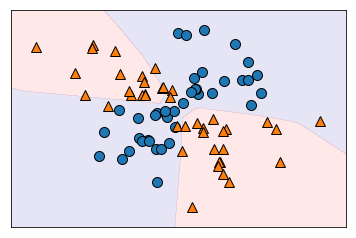

In [149]:
model_1 = MLPClassifier(hidden_layer_sizes=(10, 5)).fit(X_train,
                                                          y_train)
result_visualization(model_1, X_train, y_train)

parameter를 바꿔가며 결과를 시각화해서 비교해보자.

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


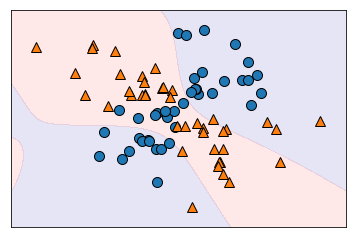

In [154]:
model_2 = MLPClassifier(hidden_layer_sizes=(10, 5),
                     activation='tanh').fit(X_train, y_train)
result_visualization(model_2, X_train, y_train)

relu 와 tanh의 비교
- tanh 의 decision boundary 가 더 부드럽다.

- relu의 decision boundary를 부드럽게 만들고 싶다면?   
층과 층의 노드 수를 늘리자. 

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


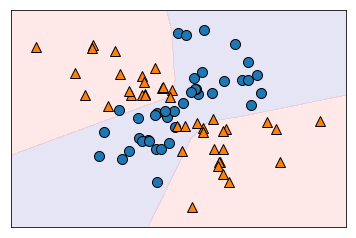

In [156]:
model_3 = MLPClassifier(hidden_layer_sizes=(10, 10, 5)).fit(X_train,
                                                          y_train)
result_visualization(model_3, X_train, y_train)

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


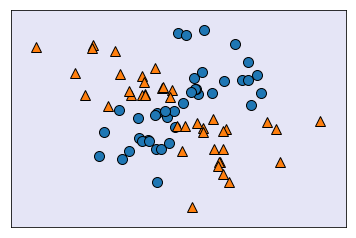

In [157]:
model_4 = MLPClassifier(hidden_layer_sizes=(10, 10, 5),
                       activation='logistic').fit(X_train, y_train)
result_visualization(model_4, X_train, y_train)

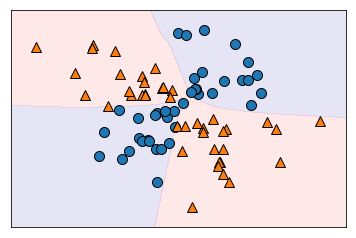

In [159]:
model_5 = MLPClassifier(hidden_layer_sizes=(10, 10, 5),
                       activation='logistic',
                       solver='lbfgs').fit(X_train, y_train)
result_visualization(model_5, X_train, y_train)

activation을 logistic으로 할때는 
solver가 adam보다 lbfgs가 더 낫다.

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


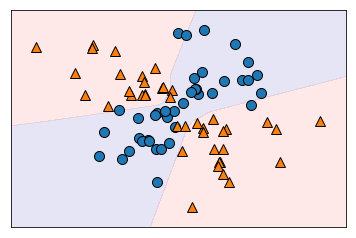

In [171]:
model_6 = MLPClassifier(hidden_layer_sizes=(10),
                       activation='relu',
                       alpha=1).fit(X_train, y_train)
result_visualization(model_6, X_train, y_train)

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


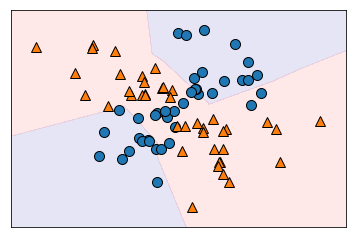

In [172]:
model_6 = MLPClassifier(hidden_layer_sizes=(10),
                       activation='relu',
                       alpha=10).fit(X_train, y_train)
result_visualization(model_6, X_train, y_train)

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


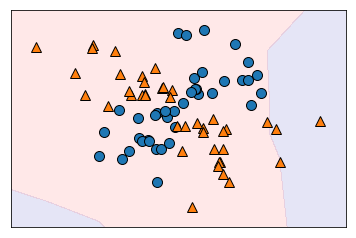

In [173]:
model_6 = MLPClassifier(hidden_layer_sizes=(10),
                       activation='relu',
                       alpha=100).fit(X_train, y_train)
result_visualization(model_6, X_train, y_train)

alpha를 크게 줄 수록 (규제를 강하게 할 수록)  
decision boundary는 각이 진다.